# Classifer

In [23]:
import numpy as np
from sklearn import svm
import cv2
import matplotlib.pyplot as plt
import os
import math

### Helper functions for image plotting, importing, and preprocessing

In [32]:
def plot_images(list_of_images, max_col = 4):
    n = len(list_of_images)
    if n == 1:
        plt.imshow(list_of_images[0]); plt.axis('off'); plt.show()
    else:
        # get number of columns and rows required
        r, c = 1, n
        if n > max_col:
            c = max_col
            r = int(math.ceil(n/max_col))
    
        fig = plt.figure(figsize=(17, max_col * r))
        for i, (img) in enumerate(list_of_images):
            ax = fig.add_subplot(r, c, (i+1))
            ax.set_title("Imgage " + str(i))
            ax.axis('off')
            ax.imshow(img, cmap=plt.cm.gray)


In [25]:
def get_train(path_dir, category, n_images):
    """
    @description Imports a selected number of resized and flattened images to grayscale
    @param path_dir Root directory for your image dataset
    @param category Category of images to choose from
    @param n_images Number of images you'd like to import
    """
    path_dir += '/train/' + category + '/'
    files_name = os.listdir(path_dir)
    imgs = []
    for c, f in enumerate(files_name):
        if c == n_images:
            break
        imgs.append(cv2.imread(path_dir + f, cv2.IMREAD_GRAYSCALE))
    return np.array(imgs)
            
def get_test(path):
    files_name = os.listdir(path + "/test/")
    imgs = []
    for c, f in enumerate(files_name):
        imgs.append(cv2.imread(path + "/test/" + f))
        if c > 10:
            break
            
    return np.array(imgs)

In [26]:
def pad_images(img_list, result_shape):
    BLACK = [0,0,0]
    result = np.empty_like(img_list)
    
    for i, img in enumerate(img_list):
        height_adjust = result_shape[0] - img.shape[0]
        width_adjust = result_shape[1] - img.shape[1]
        
        top = math.ceil(height_adjust / 2)
        bot = height_adjust - top
        left = math.ceil(width_adjust / 2)
        right = width_adjust - left
            
        result[i] = cv2.copyMakeBorder(img, top, bot, left, right, cv2.BORDER_CONSTANT, value=BLACK)
    return result

In [35]:
DATASET_DIR = './MIO-TCD-Classification'
N_IMAGES = 500

imgs_car = get_train(DATASET_DIR, 'car', N_IMAGES)
imgs_bicycle = get_train(DATASET_DIR, 'bicycle', N_IMAGES)

classification_images = np.concatenate((imgs_car, imgs_bicycle))
y_tr = np.concatenate(([1 for i in range(N_IMAGES)], [0 for i in range(N_IMAGES)]))

In [ ]:
for root, subdirs, files in os.walk(DATASET_DIR):
    

In [18]:
categories = os.listdir('./MIO-TCD-Classification/train')
number_images_category = 

['articulated_truck', 'background', 'bicycle', 'bus', 'car', 'motorcycle', 'non-motorized_vehicle', 'pedestrian', 'pickup_truck', 'single_unit_truck', 'work_van']


Pad images to maintain one common aspect ratio

In [37]:
largest_width = np.max([x.shape[0] for x in classification_images])
largest_height = np.max([x.shape[1] for x in classification_images])

padded_images = pad_images(classification_images, (largest_width, largest_height))

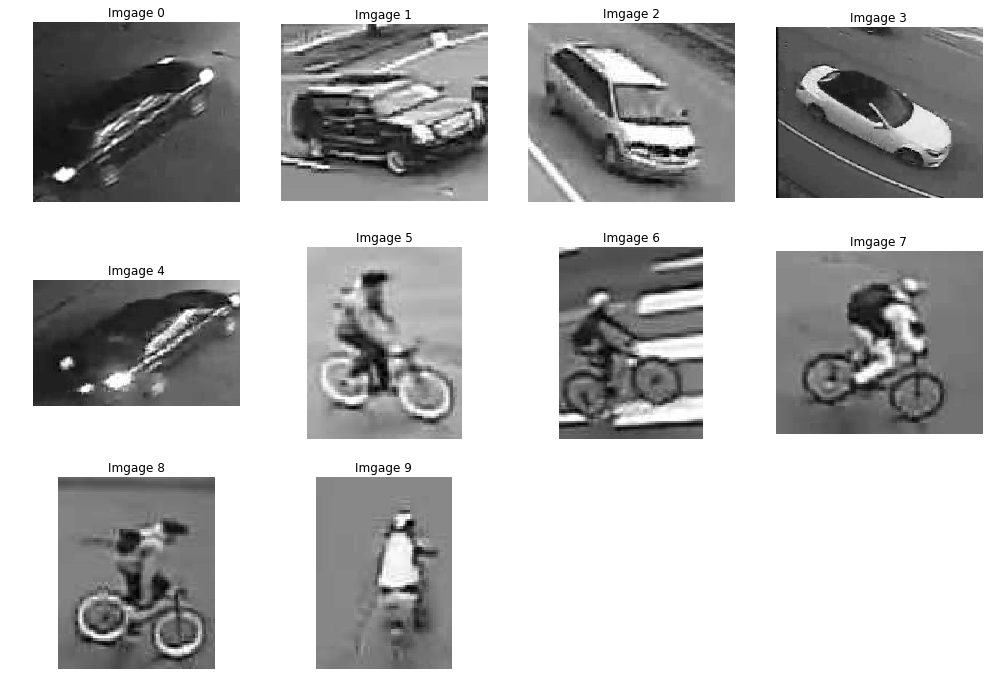

In [33]:
plot_images(classification_images)

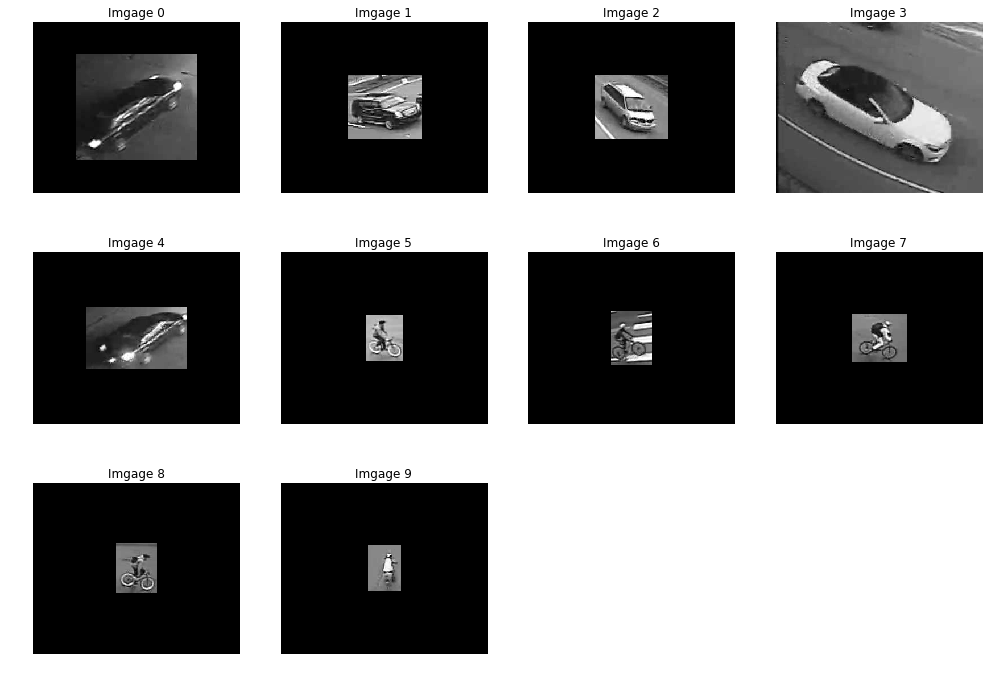

In [34]:
plot_images(padded_images)

Flatten images to prepare for SVM

In [10]:
x_tr = np.array([x.flatten() for x in padded_images])

In [15]:
def compute_svm_prediction(x_train, y_train, x_val, y_val):
    model = svm.SVC()
    model.fit(x_train, y_train)
    preds = model.predict(x_val)
    return preds

In [16]:
compute_svm_prediction(x_tr, y_tr, x_tr[:10], y_tr[:10])

C:\ProgramData\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])